In [2]:
# Thomas Glucksman
# AMATH 584, Homework 5
# Due 12/7/20

import matplotlib.pyplot as plt
import numpy as np
import os

In [89]:
## 1. Eigenvalues and Power Iterations

# (a) Generate a random, symmetric matrix A which is m by m where m = 10. Use the EIGS command in MATLAB (or the equivalent in Python) to give you the ground truth eigenvalues and eigenvectors.



In [453]:
# Generate random symmetric matrix A
m = 10
R = np.random.rand(m,m)
A = R + R.conj().T

In [454]:
# Extract ground truth eigenvalues and eigenvectors
w,v = np.linalg.eig(A)

In [352]:
# (b) Find the largest eigenvalue with the power iteration method. Compare the accuracy of the method as a function of iterations

In [353]:
# implement power iteration method
# A matrix, k iterations
def powerIterate(A, k):
    m = A.shape[0]
    
    # set initial guess vector
    v0 = np.random.rand(m)
    
    # normalize
    v0 = v0/np.linalg.norm(v0)
    v = v0
    # iterate
    for i in np.arange(k):
        w = np.dot(A, v) # w = Av
        v_k = w/np.linalg.norm(w) # normalize w
         
        v = v_k

    # Rayleigh quotient
    lam_k = np.dot(v_k, np.dot(A, v_k))

    return lam_k, v_k

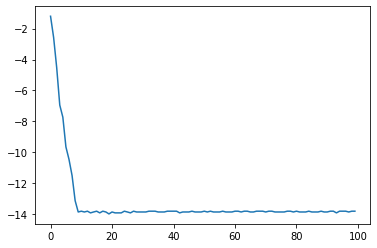

In [355]:
# Compare results of iterations to actual max eigenvalue
max_eval = np.amax(w)
res = []
for i in np.arange(100):
    power_eval, power_evec = powerIterate(A, i+1)
    accuracy = np.absolute(max_eval - power_eval)
    res.append(accuracy)

plt.plot(np.log10(res))

In [103]:
# Steep increase in accuracy from 1 to around 10 iterations, and stabilizes afterwards with accuracy between e-12 to e-14 

In [ ]:
# (c) Find all ten eigenvalues by Rayleigh Quotient iteration and guessing initial "eigenvectors". Compare the accuracy of the method as a function of iterations and discuss your initial guesses to find all eigenvalue/eigenvector pairs.

In [444]:
# implement Rayleigh Quotient iteration
# A matrix
# k iterations
# v0 initial guess vector, assume A mxm and v0 mx1
def rqIterate(A, v0, k):
    m = A.shape[0]
    I = np.eye(m)

    # normalize v0
    v0 = v0/np.linalg.norm(v0)

    # compute lambda_0
    lam_0 = np.dot(v0, np.dot(A, v0))

    v = v0
    lam = lam_0
    for i in np.arange(k):
        try:
            w0 = np.linalg.solve(A-(lam*I),v)
        except:
            print("Solution converged")
            break
        v_k = w0/np.linalg.norm(w0)
        lam_k = np.dot(v_k, np.dot(A, v_k))
        lam = lam_k
        v = v_k 

    return lam, v

In [465]:
v_guess = [] # array storing converged eigenvectors
v_guess0 = [] # array storing initial guesses for eigenvectors

v0 = np.random.rand(m)
v0 = v0/np.linalg.norm(v0)
v_guess0.append(v0)
lam_k, v_k = rqIterate(A,v0,10)

v_guess.append(v_k)

for i in range(1,m):
    v0 = np.random.rand(m)
    for j in range(0,i):
         x = v_guess[j]/np.linalg.norm(v_guess[j])
         v0 = v0-np.dot(x,np.dot(v0,x))
    
    v_guess0.append(v0)
    lam_k, v_k = rqIterate(A,v0,10)
    v_guess.append(v_k)

    


Solution converged


In [463]:
len(v_guess)

10

In [480]:
# Run RQ iteration on each initial guess vector
# store results in lam_result
lam_result = []
for i in np.arange(m):
    lam_result.append(rqIterate(A, v_guess0[i], 100)[0])

lam_result, len(np.unique(lam_result))

Solution converged


([9.127259095664703,
  -0.08919627698486063,
  0.6326164089735246,
  1.1890575406507062,
  -0.37973664383985334,
  1.1230636681572113,
  -1.1487916149696353,
  -1.3936910826417552,
  1.7187115712534016,
  -1.8116826211653634],
 10)

In [458]:
np.sort(w)

array([-1.81168262, -1.39369108, -1.14879161, -0.37973664, -0.08919628,
        0.63261641,  1.12306367,  1.18905754,  1.71871157,  9.1272591 ])

In [459]:
np.sort(lam_result)

array([-1.81168262, -1.39369108, -1.14879161, -0.37973664, -0.08919628,
        0.63261641,  1.12306367,  1.18905754,  1.71871157,  9.1272591 ])

In [483]:
v_guess0[0] - v_guess[0]

array([0.40746996, 0.3919214 , 0.30188204, 0.4300123 , 0.43254794,
       0.50480562, 0.82213124, 0.93315247, 0.69248347, 0.68759449])

In [479]:
rqIterate(A,v_guess0[9],10)[0]

-1.8116826211653634